In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [3]:
# Display the first few rows of the datasets
train_df.head(), test_df.head()


(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

In [5]:
# Check for missing values in the training data
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Check for missing values in the test data
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:

# Fill missing values in 'Age' with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the most common port
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

In [8]:
# Drop the 'Cabin' column since it has too many missing values
train_df.drop(columns='Cabin', inplace=True)
test_df.drop(columns='Cabin', inplace=True)

# Fill missing values in 'Fare' with the median fare
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [9]:
# Verify that there are no more missing values
train_df.isnull().sum(), test_df.isnull().sum()

(PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 dtype: int64,
 PassengerId    0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 dtype: int64)

In [10]:
# Convert 'Survived' to categorical type in the training data
train_df['Survived'] = train_df['Survived'].astype('category')

# Convert 'Pclass' to categorical type in both datasets
train_df['Pclass'] = train_df['Pclass'].astype('category')
test_df['Pclass'] = test_df['Pclass'].astype('category')

# Convert 'Sex' to categorical type in both datasets
train_df['Sex'] = train_df['Sex'].astype('category')
test_df['Sex'] = test_df['Sex'].astype('category')

# Convert 'Embarked' to categorical type in both datasets
train_df['Embarked'] = train_df['Embarked'].astype('category')
test_df['Embarked'] = test_df['Embarked'].astype('category')


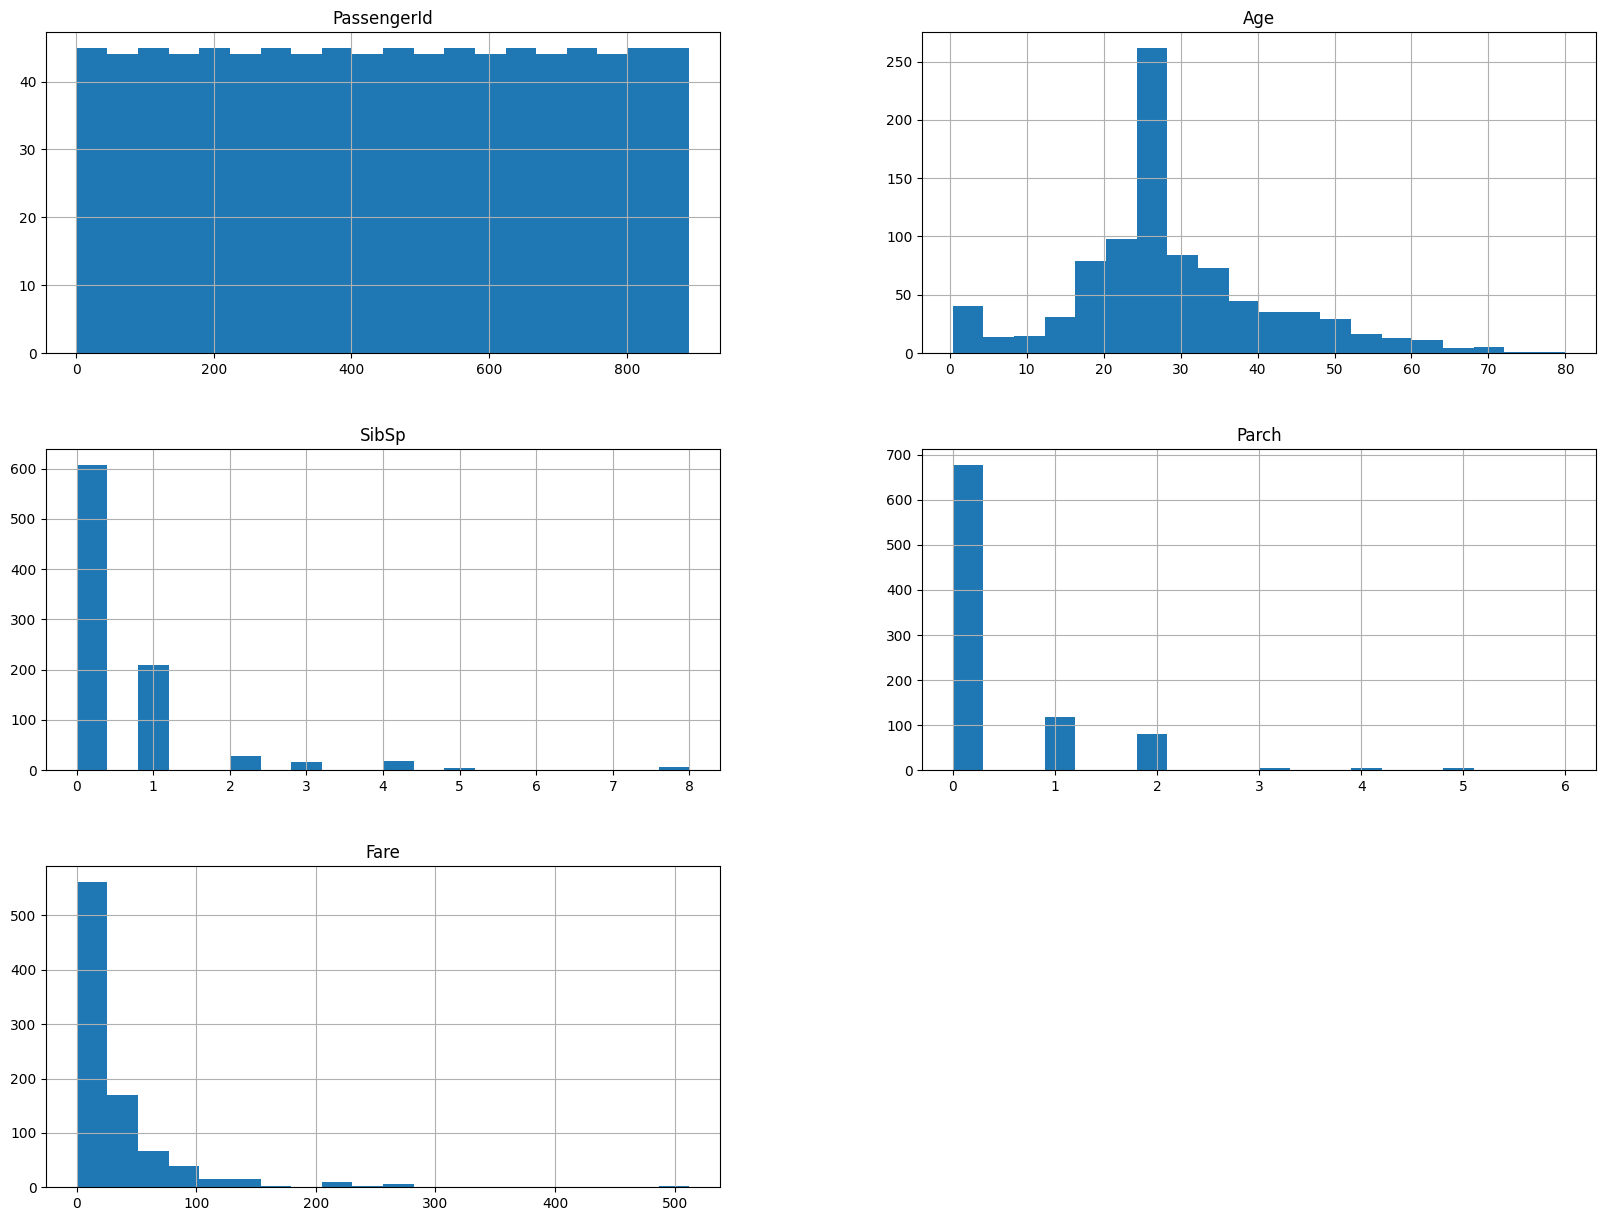

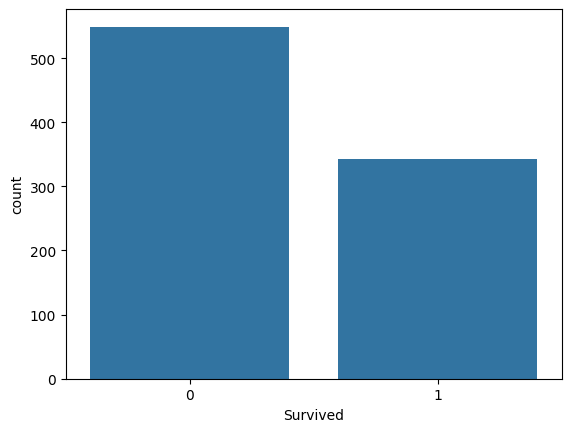

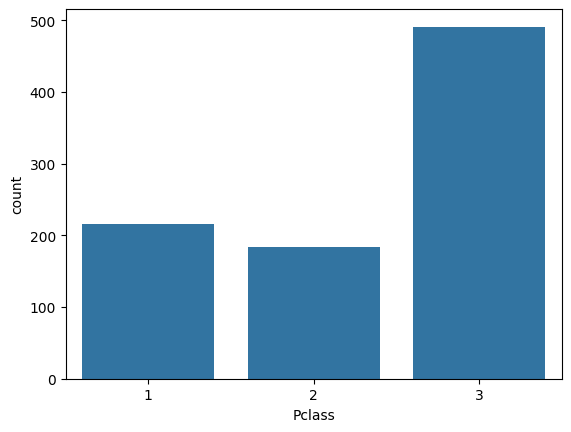

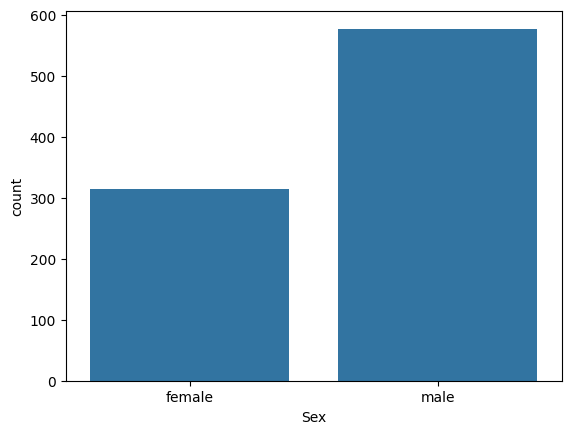

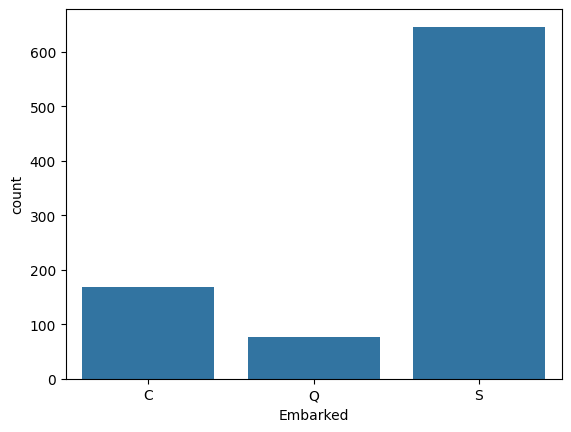

In [11]:
# Plot the distribution of numerical features
train_df.hist(bins=20, figsize=(20, 15))
plt.show()

# Plot the distribution of categorical features
for column in ['Survived', 'Pclass', 'Sex', 'Embarked']:
    sns.countplot(x=train_df[column])
    plt.show()


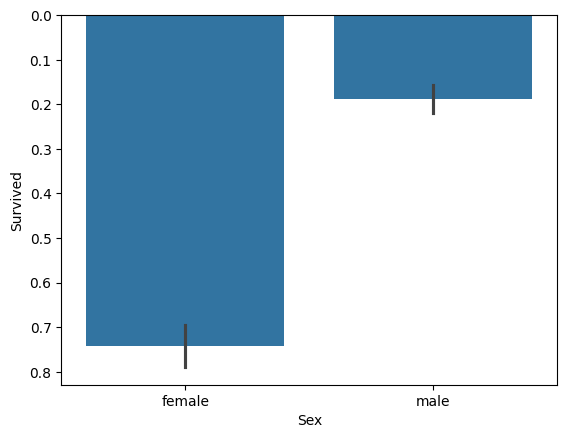

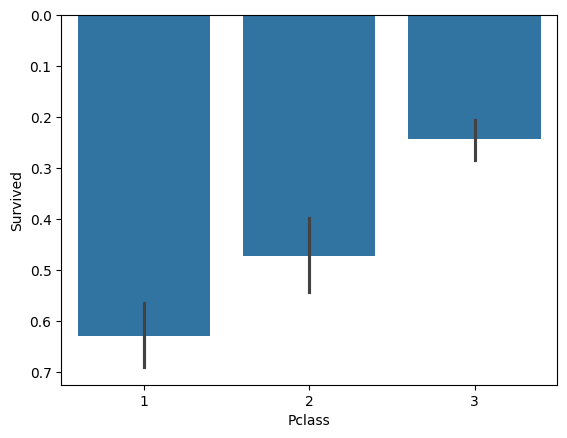

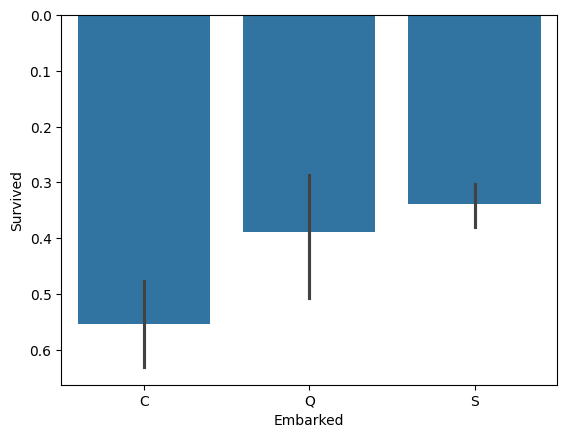

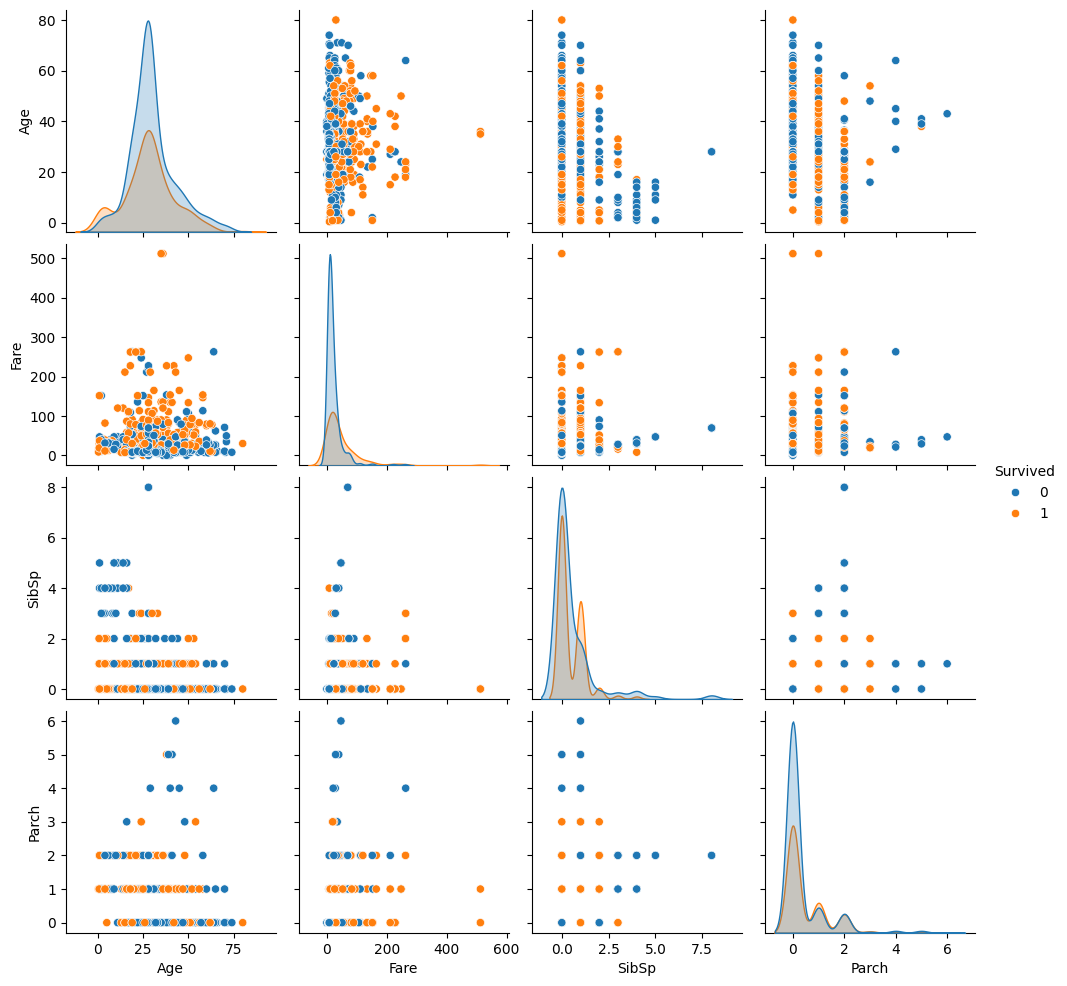

In [12]:
# Plot the survival rate by gender
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.show()

# Plot the survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.show()

# Plot the survival rate by embarkation port
sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.show()

# Pairplot to see the relationships between numerical variables
sns.pairplot(train_df, hue='Survived', vars=['Age', 'Fare', 'SibSp', 'Parch'])
plt.show()


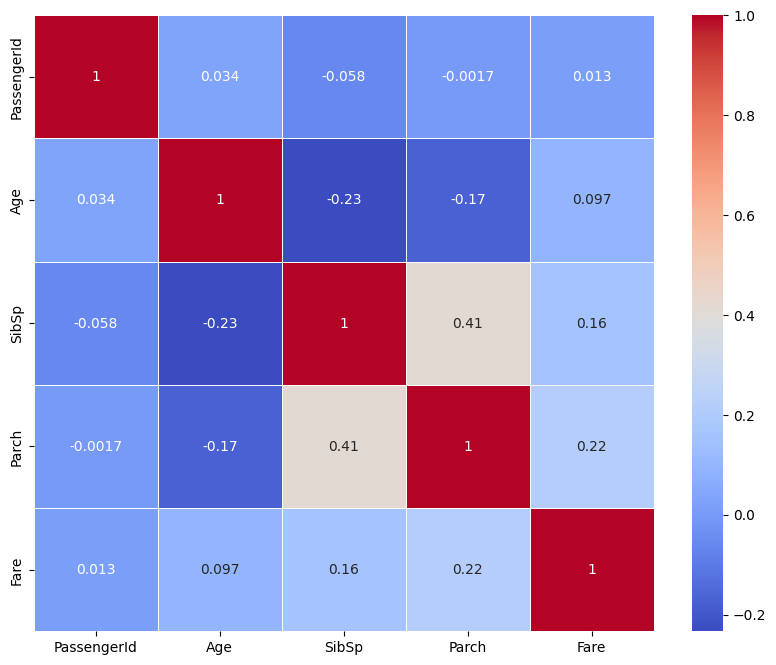

In [14]:
# Select only the numeric columns
numeric_train_df = train_df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_train_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [15]:
# Create a new feature 'FamilySize' as the sum of 'SibSp' and 'Parch' + 1 (self)
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Create a new feature 'IsAlone' (1 if FamilySize is 1, else 0)
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)


In [16]:
# Convert categorical features to numeric using one-hot encoding
train_df = pd.get_dummies(train_df, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

# Ensure both datasets have the same columns
test_df = test_df.reindex(columns=train_df.columns.drop('Survived'), fill_value=0)


In [17]:
test_df

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsAlone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,False,True,True,True,False
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,2,0,False,True,False,False,True
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1,True,False,True,True,False
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,1,False,True,True,False,True
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,3,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",27.0,0,0,A.5. 3236,8.0500,1,1,False,True,True,False,True
414,1306,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,1,1,False,False,False,False,False
415,1307,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,1,1,False,True,True,False,True
416,1308,"Ware, Mr. Frederick",27.0,0,0,359309,8.0500,1,1,False,True,True,False,True


In [18]:
train_df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsAlone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,0,False,True,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,0,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,1,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,0,False,False,False,False,True
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,1,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,1,True,False,True,False,True
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,1,False,False,False,False,True
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,4,0,False,True,False,False,True
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,1,False,False,True,False,False
